In [1]:
import os
import grid2op
from grid2op.Parameters import Parameters
import numpy as np
import shutil
from examples.ppo_stable_baselines.C_evaluate_trained_model import load_agent
import matplotlib.pyplot as plt

from sklearn.cluster import AffinityPropagation, KMeans
from tqdm.notebook import tqdm
from grid2op.Runner import Runner
from lightsim2grid import LightSimBackend
from CustomGymEnv import CustomGymEnv

path_agents = "study_rl_agent"

In [3]:
ENV_NAME = "l2rpn_wcci_2022_dev_val"

p = Parameters()
p.LIMIT_INFEASIBLE_CURTAILMENT_STORAGE_ACTION = True

env = grid2op.make(ENV_NAME, backend=LightSimBackend(), param=p)

shutil.rmtree(os.path.abspath(path_agents), ignore_errors=True)
if not os.path.exists(path_agents):
    os.mkdir(path_agents)

# make a runner for this agent
agent_name = "CustomGymEnv_2022-05-06_18-51"
gymenv_kwargs = {"safe_max_rho": 0.9}

path_agent = os.path.join(path_agents, agent_name)
shutil.rmtree(os.path.abspath(path_agent), ignore_errors=True)
load_path = os.path.join("saved_model", agent_name)

my_agent = load_agent(env, load_path="saved_model", name=agent_name, gymenv_class=CustomGymEnv, gymenv_kwargs=gymenv_kwargs)

In [4]:
runner = Runner(**env.get_params_for_runner(),
                agentClass=None,
                agentInstance=my_agent
                )
res = runner.run(path_save=path_agent,
                 nb_episode=21,
                 pbar=tqdm)

episode:   0%|          | 0/21 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

episode:   0%|          | 0/2017 [00:00<?, ?it/s]

In [5]:
from grid2op.Episode import EpisodeData
episode_studied = EpisodeData.list_episode(path_agent)
len(episode_studied)

21

In [6]:
this_episode = EpisodeData.from_disk(*episode_studied[20])

In [7]:
curtailment_actions = []
storage_power_actions = []

for ep in episode_studied:
  this_episode = EpisodeData.from_disk(*ep)
  for act in this_episode.actions:
      dict_ = act.as_dict()
      if "storage_power" in dict_:
        storage_power_actions.append(dict_["storage_power"])
      if "curtailment" in dict_:
        curtailment_actions.append(dict_["curtailment"][dict_["curtailment"] >= 0])

curtailment_actions = np.array(curtailment_actions)
storage_power_actions = np.array(storage_power_actions)

In [8]:
var = np.var(curtailment_actions, axis=0)
mean = np.mean(curtailment_actions, axis=0)

plt.figure(figsize=(8, 6))
plt.bar(np.arange(0, curtailment_actions.shape[1], 1), var)
plt.xlabel("Renewable power plants")
_=plt.ylabel("Curtailment variance")

/home/gaetan/miniconda3/envs/L2RPN/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/gaetan/miniconda3/envs/L2RPN/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/gaetan/miniconda3/envs/L2RPN/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gaetan/miniconda3/envs/L2RPN/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gaetan/miniconda3/envs/L2RPN/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: tuple index out of range

<Figure size 576x432 with 0 Axes>

In [9]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(0, curtailment_actions.shape[1], 1), mean)
plt.xlabel("Renewable power plants")
_=plt.ylabel("Curtailment mean")

IndexError: tuple index out of range

<Figure size 576x432 with 0 Axes>

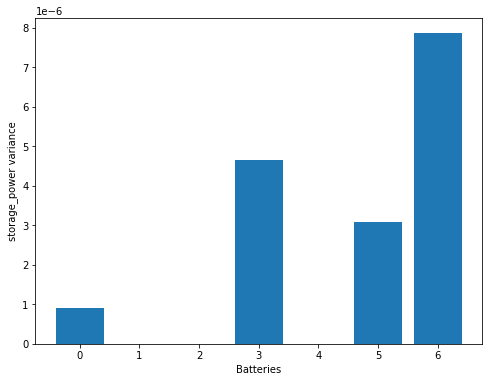

In [10]:
var = np.var(storage_power_actions, axis=0)
mean = np.mean(storage_power_actions, axis=0)

plt.figure(figsize=(8, 6))
plt.bar(np.arange(0, storage_power_actions.shape[1], 1), var)
plt.xlabel("Batteries")
_=plt.ylabel("storage_power variance")

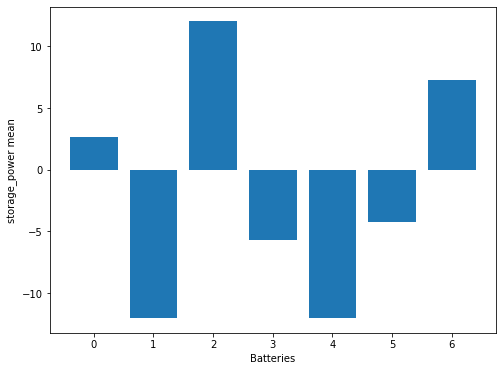

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(0, storage_power_actions.shape[1], 1), mean)
plt.xlabel("Batteries")
_=plt.ylabel("storage_power mean")

In [12]:
n_clusters = 10
clustering = KMeans(n_clusters=n_clusters, random_state=42).fit(curtailment_actions)
for i in range(n_clusters):
  print(f"{((clustering.labels_==i).sum() / clustering.labels_.shape[0]) * 100:.4f}% of the data are in the cluster {i}")
  mask = clustering.labels_==i
  mean_dist = ((curtailment_actions[mask] - clustering.cluster_centers_[i])**2).sum(axis=0).mean()
  print(f"The average distance to the cluster center is {mean_dist:.4f}")

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [14]:
n_clusters = 10
clustering = KMeans(n_clusters=n_clusters, random_state=42).fit(storage_power_actions)
for i in range(n_clusters):
  print(f"{((clustering.labels_==i).sum() / clustering.labels_.shape[0]) * 100:.4f}% of the data are in the cluster {i}")
  mask = clustering.labels_==i
  mean_dist = ((storage_power_actions[mask] - clustering.cluster_centers_[i])**2).sum(axis=0).mean()
  print(f"The average distance to the cluster center is {mean_dist:.4f}")

45.7333% of the data are in the cluster 0
The average distance to the cluster center is 0.0000
0.4667% of the data are in the cluster 1
The average distance to the cluster center is 0.0000
4.4667% of the data are in the cluster 2
The average distance to the cluster center is 0.0000
3.8000% of the data are in the cluster 3
The average distance to the cluster center is 0.0000
14.5333% of the data are in the cluster 4
The average distance to the cluster center is 0.0000
0.3333% of the data are in the cluster 5
The average distance to the cluster center is 0.0000
0.3333% of the data are in the cluster 6
The average distance to the cluster center is 0.0000
26.8000% of the data are in the cluster 7
The average distance to the cluster center is 0.0000
3.2000% of the data are in the cluster 8
The average distance to the cluster center is 0.0000
0.3333% of the data are in the cluster 9
The average distance to the cluster center is 0.0000
